Final conclusions : 

accuracy with cutouts: 86.96%
accuracy without cutouts: 86.43%

# Model 1: Without cutouts and gradcam results :

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


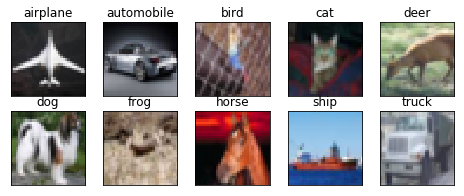

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D
# Define the model

# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3, border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3, border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Ke

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0710 14:35:00.384769 140467806918528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()
W0710 14:35:29.576180 140467806918528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.w

Epoch 1/50
390/390 [==============================] - 17s 44ms/step - loss: 1.3465 - acc: 0.5139 - val_loss: 1.1245 - val_acc: 0.6209
Epoch 2/50
390/390 [==============================] - 12s 32ms/step - loss: 0.9329 - acc: 0.6693 - val_loss: 0.9029 - val_acc: 0.6825
Epoch 3/50
390/390 [==============================] - 12s 32ms/step - loss: 0.7763 - acc: 0.7256 - val_loss: 0.7587 - val_acc: 0.7362
Epoch 4/50
390/390 [==============================] - 12s 32ms/step - loss: 0.6601 - acc: 0.7691 - val_loss: 0.7847 - val_acc: 0.7274
Epoch 5/50
390/390 [==============================] - 12s 32ms/step - loss: 0.5917 - acc: 0.7927 - val_loss: 0.7201 - val_acc: 0.7569
Epoch 6/50
390/390 [==============================] - 13s 32ms/step - loss: 0.5277 - acc: 0.8151 - val_loss: 0.7028 - val_acc: 0.7611
Epoch 7/50
390/390 [==============================] - 12s 32ms/step - loss: 0.4799 - acc: 0.8330 - val_loss: 0.6434 - val_acc: 0.7829
Epoch 8/50
390/390 [==============================] - 12s 32ms

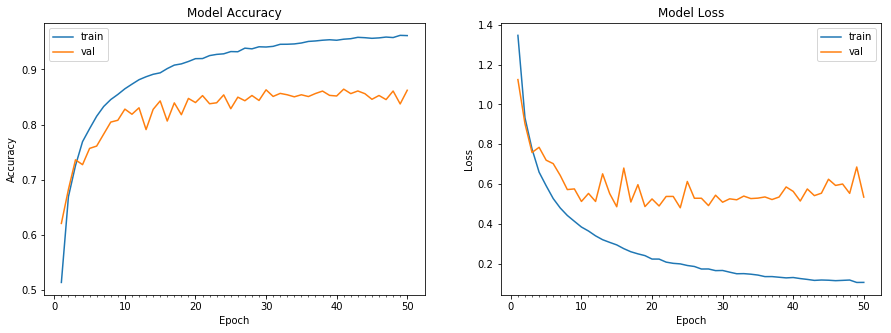

In [0]:
plot_model_history(model1.history)

In [0]:
print('MAXIMUM VALIDATION ACCURACY WITHOUT CUTOUTS : ',round(max(model1.history.history['val_acc']),4))

MAXIMUM VALIDATION ACCURACY WITHOUT CUTOUTS :  0.8643


#### Gradcam results for model 1 without cutouts

In [0]:
predicted = model1.predict(test_features)
predicted_classes = np.argmax(predicted,axis=1)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
true_classes = np.argmax(test_labels,axis=1)
true_classes

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
labels = {0:'airplane', 
          1:'automobile',
          2:'bird',
          3:'cat',
          4:'deer',
          5:'dog',
          6:'frog',
          7:'horse',
          8:'ship',
          9:'truck'}

W0710 15:24:05.017532 140467806918528 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0710 15:24:05.686662 140467806918528 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0710 15:24:06.386813 140467806918528 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0710 15:24:07.168392 140467806918528 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


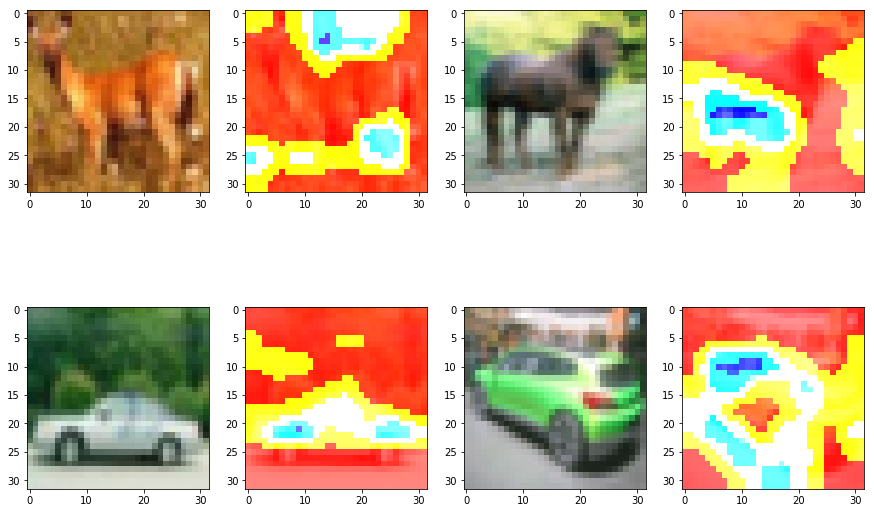

In [0]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

flag=0
n_row = 2
n_col = 4
k=0
plt.figure(figsize=(15,10))

for j in [110,220,330,440]:
  true_label = true_classes[j]
  predicted_label = predicted_classes[j]
  x = test_features[j]
  x = np.expand_dims(x, axis=0)
  preds = model1.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model1.output[:, class_idx]
  last_conv_layer = model1.get_layer("conv2d_16")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = (test_features[j])
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0,dtype=cv2.CV_32F)
  plt.subplot(n_row, n_col, k + 1)
  plt.imshow(img)
  k = k+1
  plt.subplot(n_row, n_col, k + 1)
  plt.imshow(superimposed_img)
  k = k+1
  print (" ")

# Model 2 : with cutouts and gradcam results

In [0]:
### NOTE: SAME ARCHITECTURE AS ABOVE
from keras.layers import AveragePooling2D


# Define the model
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(64, 3, 3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Convolution2D(32, 1, 1))


model2.add(Convolution2D(64, 3, 3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(128, 3, 3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Convolution2D(32, 1, 1))


model2.add(Convolution2D(128, 3, 3, border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(256, 3, 3, border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Convolution2D(10, 1, 1))

model2.add(AveragePooling2D(pool_size = (4,4)))
model2.add(Flatten())


model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Co

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

W0710 15:26:20.175507 140435874953088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0,
                             horizontal_flip=False,
                            preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':
W0710 15:26:25.218440 140435874953088 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/50
390/390 [==============================] - 34s 86ms/step - loss: 1.4505 - acc: 0.4785 - val_loss: 1.2442 - val_acc: 0.5703
Epoch 2/50
390/390 [==============================] - 30s 76ms/step - loss: 1.0433 - acc: 0.6291 - val_loss: 0.9574 - val_acc: 0.6669
Epoch 3/50
390/390 [==============================] - 29s 76ms/step - loss: 0.8833 - acc: 0.6868 - val_loss: 0.9048 - val_acc: 0.6966
Epoch 4/50
390/390 [==============================] - 29s 75ms/step - loss: 0.7786 - acc: 0.7255 - val_loss: 0.7629 - val_acc: 0.7401
Epoch 5/50
390/390 [==============================] - 29s 75ms/step - loss: 0.7159 - acc: 0.7483 - val_loss: 0.8184 - val_acc: 0.7353
Epoch 6/50
390/390 [==============================] - 29s 75ms/step - loss: 0.6602 - acc: 0.7697 - val_loss: 0.7180 - val_acc: 0.7562
Epoch 7/50
390/390 [==============================] - 29s 75ms/step - loss: 0.6179 - acc: 0.7841 - val_loss: 0.5898 - val_acc: 0.7993
Epoch 8/50
390/390 [==============================] - 29s 75ms

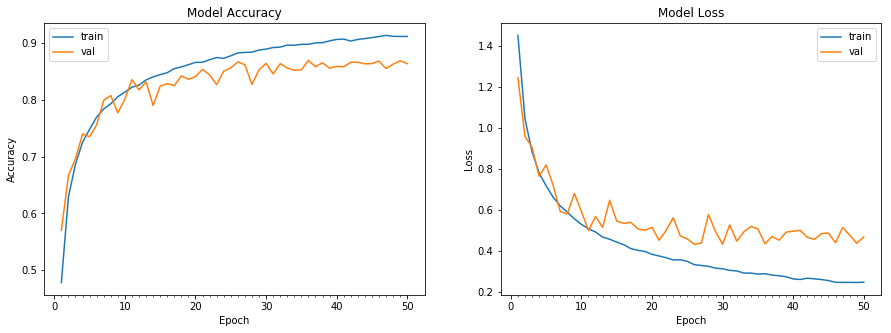

In [0]:
plot_model_history(model_info)

In [0]:
print('MAXIMUM VALIDATION ACCURACY WITH CUTOUTS: ',round(max(model_info.history['val_acc']),4))

MAXIMUM VALIDATION ACCURACY WITH CUTOUTS:  0.8696


#### Gradcam results for model 2 with cutouts

In [0]:
predicted = model2.predict(test_features)
predicted_classes = np.argmax(predicted,axis=1)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
true_classes = np.argmax(test_labels,axis=1)
true_classes

array([3, 8, 8, ..., 5, 1, 7])

W0710 15:51:47.142487 140435874953088 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0710 15:51:47.602899 140435874953088 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0710 15:51:48.097186 140435874953088 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0710 15:51:48.570815 140435874953088 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


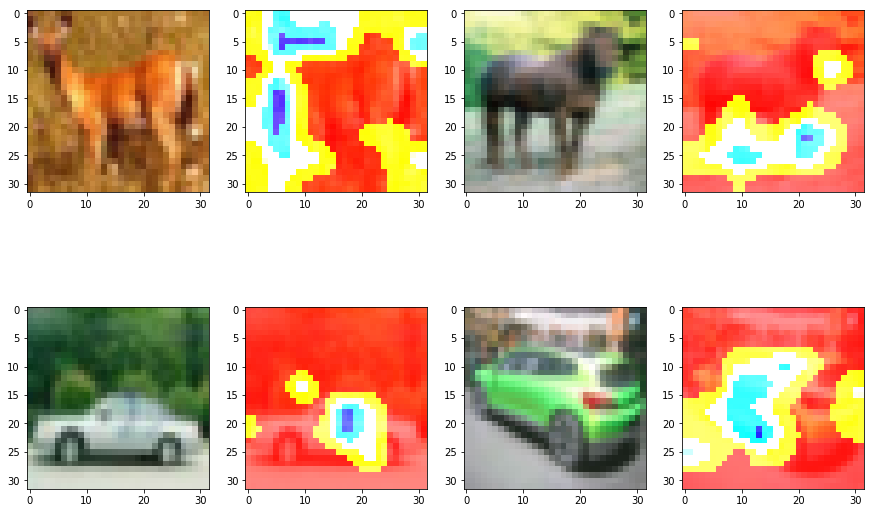

In [0]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

flag=0
n_row = 2
n_col = 4
k=0
plt.figure(figsize=(15,10))

for j in [110,220,330,440]:
  true_label = true_classes[j]
  predicted_label = predicted_classes[j]
  x = test_features[j]
  x = np.expand_dims(x, axis=0)
  preds = model2.predict(x,batch_size=1)
  class_idx = np.argmax(preds[0])
  class_output = model2.output[:, class_idx]
  last_conv_layer = model2.get_layer("conv2d_16")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model2.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  img = (test_features[j])
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0,dtype=cv2.CV_32F)
  plt.subplot(n_row, n_col, k + 1)
  plt.imshow(img)
  k = k+1
  plt.subplot(n_row, n_col, k + 1)
  plt.imshow(superimposed_img)
  k = k+1
  print (" ")

### Using cutouts, we see a gain of 0.7% 

accuracy with cutouts: 86.96%
accuracy without cutouts: 86.43%